Using device: cpu


Saving Dataset.xlsx to Dataset (2).xlsx
Columns in data: Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'Ductility index(deltau/deltay)',
       'Ductility index(deltap/deltay)', 'Max Load', 'Deltap', 'kfold'],
      dtype='object')
Number of rows in data: 88
Training set size: (70, 10)
Testing set size: (18, 10)
Epoch [1/200], Loss: 0.1545
Epoch [2/200], Loss: 0.1480
Epoch [3/200], Loss: 0.1417
Epoch [4/200], Loss: 0.1355
Epoch [5/200], Loss: 0.1294
Epoch [6/200], Loss: 0.1234
Epoch [7/200], Loss: 0.1174
Epoch [8/200], Loss: 0.1114
Epoch [9/200], Loss: 0.1055
Epoch [10/200], Loss: 0.0996
Epoch [11/200], Loss: 0.0938
Epoch [12/200], Loss: 0.0880
Epoch [13/200], Loss: 0.0824
Epoch [14/200], Loss: 0.0770
Epoch [15/200], Loss: 0.0718
Epoch [16/200], Loss: 0.0668
Epoch [17/200], Loss: 0.0621
Epoch 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Epoch [63/200], Loss: 0.0192
Epoch [64/200], Loss: 0.0189
Epoch [65/200], Loss: 0.0186
Epoch [66/200], Loss: 0.0183
Epoch [67/200], Loss: 0.0181
Epoch [68/200], Loss: 0.0178
Epoch [69/200], Loss: 0.0175
Epoch [70/200], Loss: 0.0173
Epoch [71/200], Loss: 0.0170
Epoch [72/200], Loss: 0.0168
Epoch [73/200], Loss: 0.0165
Epoch [74/200], Loss: 0.0163
Epoch [75/200], Loss: 0.0160
Epoch [76/200], Loss: 0.0158
Epoch [77/200], Loss: 0.0155
Epoch [78/200], Loss: 0.0153
Epoch [79/200], Loss: 0.0151
Epoch [80/200], Loss: 0.0149
Epoch [81/200], Loss: 0.0147
Epoch [82/200], Loss: 0.0145
Epoch [83/200], Loss: 0.0143
Epoch [84/200], Loss: 0.0141
Epoch [85/200], Loss: 0.0139
Epoch [86/200], Loss: 0.0138
Epoch [87/200], Loss: 0.0136
Epoch [88/200], Loss: 0.0135
Epoch [89/200], Loss: 0.0133
Epoch [90/200], Loss: 0.0132
Epoch [91/200], Loss: 0.0130
Epoch [92/200], Loss: 0.0129
Epoch [93/200], Loss: 0.0127
Epoch [94/200], Loss: 0.0126
Epoch [95/200], Loss: 0.0125
Epoch [96/200], Loss: 0.0123
Epoch [97/200]

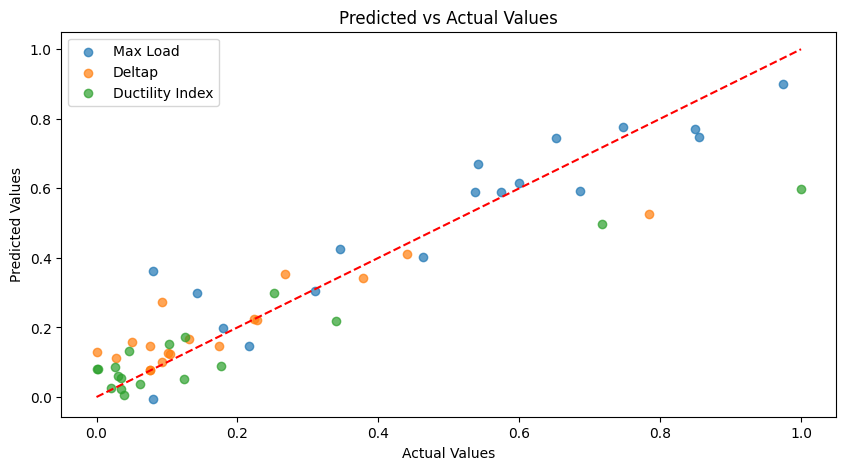

Evaluation Metrics for Output 1:
R²: 0.8585, RMSE: 0.1024, MAE: 0.0805

Evaluation Metrics for Output 2:
R²: 0.7533, RMSE: 0.0921, MAE: 0.0614

Evaluation Metrics for Output 3:
R²: 0.7789, RMSE: 0.1231, MAE: 0.0821



In [ ]:
# Step 1: Install Required Libraries
!pip install torch torchvision pandas scikit-learn matplotlib openpyxl seaborn

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import math
from sklearn import model_selection
import os
import torch
from torch import nn
torch.manual_seed(3)
torch.cuda.manual_seed_all(3)

# Step 3: Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Step 4: Define Custom Metrics
from sklearn.metrics import r2_score, mean_squared_log_error, explained_variance_score, mean_absolute_error, mean_squared_error

def R2(y_true, y_pred):
    return r2_score(y_true, y_pred)

def MSLE(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)

def EX_VAR(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)

def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MAP(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) / yt
    return (error / len(y_true)) * 100

# Step 5: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
dataset_name = list(uploaded.keys())[0]
DataSet = pd.read_excel('/content/Dataset.xlsx').drop(columns=[
    'name', 'DOI', 'content (%)', 'concrete elastic modulus(GPa)',
    'steel fiber type']).dropna()

# Step 6: Data Preparation
# Copy data
data = DataSet.copy()

# Scaling data to [0, 1]
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

# Add kfold column with default value -1
data['kfold'] = -1

# Display information about data
print("Columns in data:", data.columns)
print("Number of rows in data:", len(data))
data.head()
from sklearn.model_selection import train_test_split

# Separate features (X) and target variables (y)
X = data.drop(columns=['Max Load', 'Deltap', 'Ductility index(deltap/deltay)', 'kfold'])
y = data[['Max Load', 'Deltap', 'Ductility index(deltap/deltay)']]

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
class ANN(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of features
output_size = y_train.shape[1]  # Number of target variables
model = ANN(input_size, output_size).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)
# Training loop
epochs = 200  # Increased to 200 epochs
for epoch in range(epochs):
    # Forward pass
    model.train()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss for every epoch
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Convert predictions and targets to CPU for further analysis
y_pred = y_pred.cpu().numpy()
y_test = y_test_tensor.cpu().numpy()
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], label='Max Load', alpha=0.7)
plt.scatter(y_test[:, 1], y_pred[:, 1], label='Deltap', alpha=0.7)
plt.scatter(y_test[:, 2], y_pred[:, 2], label='Ductility Index', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    r2_values = []
    rmse_values = []
    mae_values = []
    for i in range(y_true.shape[1]):
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        r2_values.append(r2)
        rmse_values.append(rmse)
        mae_values.append(mae)
    return r2_values, rmse_values, mae_values

# Calculate metrics for all target variables
r2_values, rmse_values, mae_values = calculate_metrics(y_test, y_pred)

# Display the results for each output
for i, (r2, rmse, mae) in enumerate(zip(r2_values, rmse_values, mae_values)):
    print(f"Evaluation Metrics for Output {i + 1}:")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")
